# MFE 230P: ASSIGNMENT IV
**MUSTAFA S EISA** \\ SUGGESTED SOLUTION

# 1. A Simple Exercise in Diversification

You have \$12,000 to invest at the beginning of the year, and three different funds from which to choose. The municipal bond fund has a 7% yearly return, the local bank's Certificates of Deposit (CDs) has an 8% return, and a high-risk account has an expected (hoped-for) 12% return. To minimize risk, you decide not to invest any more than \$2,000 in the high-risk account. For tax reasons, you need to invest at least three times as much in the municipal bonds as in the bank CDs.

Denote by $x,y,z$ the amounts (in thousands) invested in bonds, CDs, and high-risk account, respectively. Assuming the year-end yields are as expected, what are the optimal investment amounts for each fund? Your answer should include a problem formulation (as a mathematical program), source code used to solve this problem using only `cvxpy`, and the optimal investment amounts for each account.

### SOLUTION.

This problem can be formulated as the following optimization problem:

\begin{align}
    & \underset{x, y, z}{\text{maximize}} & & 1.07x + 1.08y + 1.12z \\
    & \text{subject to} & & z \le 2, x+y+z \le 12, x \ge 3y. 
%    & & & x + y + z \le 12 \\
%    & & & x \ge 3y.
\end{align}

We implement this program in `cvxypy` as follows

In [2]:
import cvxpy as cvx

x = cvx.Variable(); y = cvx.Variable(); z = cvx.Variable()

objective = cvx.Maximize(1.07*x + 1.08*y + 1.12*z)
constraints = [
    z <= 2, 
    x + y + z <= 12,
    x >= 3*y
]

pstar = cvx.Problem(objective, constraints).solve()

The optimal investment quantities are $x=7.5$, $y=2.5$, and $z=2$.

# 2. Modeling Transaction Costs with _Berhu_

In this question, we'll turn to the reversed Huber function which can be used to robustly model transaction costs and market impact. Specifically, we consider the following portfolio optimization problem

\begin{align}
    & \underset{x \in \mathbb{R}^p}{\text{maximize}} & & \hat{r}^\top x - \lambda x^\top Cx - c \cdot T(x-x^0)  \\
    & \text{subject to} & &  \sum_{i=1}^p x_i = 1, \ x \ge 0
\end{align}

where $C$ is the empirical covariance matrix, $\hat{r}$ is the empirical mean based on historical data, and $\lambda$ as well as $c$ are hyper-parameters to be discussed. The function $T(\cdot)$ represents transaction costs and market impact, $x^0 \in \mathbb{R}^p$ is the vector of initial positions. The function $T$ takes the form

$$T\left(x - x^0\right)  = \sum_{i=1}^p B_M\left(x_i - x_i^0\right)$$

where the function $B_M(\cdot)$ is piece-wise linear for small $x$ and quadratic for large $x$. In this way, we seek to capture the fact that transaction costs are dominant for smaller trades while market impact kicks in for larger ones. Precisely, we define $B_M$ to be the so-called _berhu_ or _reversed Huber_ function with
cut-off parameter $M \geq 0$. That is, for a scalar $z$, 

$$B_M(z) := \left\{ 
    \begin{array}{ll}
	|z| & \mbox{if } |z| \le M, \\
	\frac{z^2+M^2}{2M} & \mbox{otherwise.}
    \end{array}
\right.$$

### A. Inner Problem Characterization

Prove that the reversed Huber function is equivalent to the following optimization problem

$$B_M(z) = \min_{v,w} \: v+w+\frac{w^2}{2M} \text{ subject to } |z| \le v+w, \;\; v \le M, \;\; w \ge 0$$

Is the reversed Huber function convex in $z$? Justify your answer.

### SOLUTION.

First consider the case when $|z| \le M$. Since $|z| \le v + w$ and $w \ge 0$, the minimum value of $v$ is $|z| - w$ and it is less than or equal to $M$. Substituting $v$ with its minimum value in $B_M$, we can eliminate the variable $v$ and obtain

$$B_M(z) = \min_{w} \: |z|+\frac{w^2}{2M} \text{ subject to } w \ge 0$$

The objective function is minimized for $w=0$, so

$$\forall |z| \le M: B_M(z) = |z|$$

Now, let's consider the case when $|z| \ge M$. From $|z| \le v+w$, we have $v \ge |z| - w$. Because $v \le M$, $|z| \ge M$, $w\ge0$, the minimum value for $v$ is $|z| - w$. $v$ is feasible if $ M \ge v \ge |z| - w$, so $w \ge |z| - M \ge 0$. Substituting $v$ with its the minimum value in $B_M$, we have

$$B_M(z) = \min_{w} \: |z|+\frac{w^2}{2M} \text{ subject to } w \ge |z| - M$$

The objective function is minimized for $w=|z| - M$, so we have 

$$\forall |z| \ge M: B_M(z) = \frac{z^2+M^2}{2M}$$

The function $B_M(z)$ is convex in $z$ since it is the solution to the quadratic program

$$B_M(z) = \min_{v,w} \: v+w+\frac{w^2}{2M} \text{ subject to } |z| \le v+w, \;\; v \le M, \;\; w \ge 0$$

which is a quadratic programming problem.

### B. Outer Problem Characterization

Show that, for given $x, x^0 \in \mathbb{R}^p$

$$T\left(x-x^0\right) = \min_{w,v} \: \mathbf{1}^\top (v+w)+\frac{w^\top w}{2M} \text{ subject to } v \le M \mathbf{1}, \;\; w \ge 0, \;\; \left|x-x^0\right| \le v+w$$

where, $v,w \in \mathbb{R}^p$, $\mathbf{1} \in \{1\}^p$ is the vector of ones, and the absolute value function $|\cdot|$ is applied component-wise on vectors.

### SOLUTION.

For given $x, x^0$, we have

\begin{align}
    T\left(x - x^0\right)  & = \sum_{i=1}^p B_M\left(x_i - x_i^0\right) \\ 
        & = \sum_{i=1}^p \min_{v_i,w_i} \: v_i+w_i+\frac{w_i^2}{2M} \text{ subject to }   v_i \le M, \;\; w_i \ge 0 \;\;  \left|x_i - x_i^0\right| \le v_i+w_i, \\
        & = \min_{v, w} \mathbf{1}^\top (v+w)+\frac{w^\top w }{2M} \text{ subject to } v \le M
        \mathbf{1}, \;\; w \ge 0, \;\; \left|x-x^0\right| \le v+w.
\end{align}

where we simply move the minimum outside the summation in light of the fact the $p$ scalar problems are mutually-decoupled.

### C. A Tractable Convex Formulation

Now re-formulate the optimization problem provided in the preamble as a convex optimization problem. Which programming class does this problem belong to (LP, QP, SOCP, etc.)?

### SOLUTION.

Substituting the expression for $T\left(x-x^0\right)$ obtained in part B into the problem in the preamble, we can re-formulate the problem as

\begin{align}
    &\underset{x,v,w \in \mathbb{R}^p}{\text{maximize }} & & \hat{r}^\top x - c\cdot \mathbf{1}^\top (v+w) - \lambda x^\top Cx - c\cdot \frac{w^\top w}{2M} \\
    & \text{subject to } & & \sum_1^p x_i = 1, v \le M \mathbf{1}, \left|x - x^0\right| \le v + w, w \ge 0, x \ge 0 
\end{align}

The objective contains terms that are quadratic in $x$ and $w$, while all other terms and constraints are linear. Therefore, this problem is a quadratic programming problem.

# 3. Robust Portfolio Optimization

In this question, we consider a robust portfolio optimization problem, which can be formulated in the SOCP form. Markowitz portfolio theory states that an investor can reduce portfolio risk by
holding a diversified portfolio of assets. A portfolio is ``efficient'' if it achieves the highest expected return with a given risk (measured by standard deviation). The set of efficient portfolios form a curve on the return versus standard deviation plane. The curve is called efficient frontier. To compute and plot the efficient frontier, we can formulate the portfolio optimization problem as the following quadratic programming (QP) problem:

\begin{align}
    & \underset{x \in \mathbb{R}^p}{\text{minimize }} & & x^\top Cx \\
    & \text{ subject to } & & \hat{r}^\top x \ge t, \sum_{i=1}^p x_i = 1
\end{align}

Here, $x \in \mathbb{R}^p$ is the asset allocation vector and $p$ is the number of assets. Each component $x_i$ corresponds to the percentage of money invested in the $i^{th}$ asset. Consequently, we have the constraint that the sum of $x_i$ is $1$. The return vector $r \in \mathbb{R}^p$ is a random variable with $\hat{r}$ denoting its expectation and $C$ its corresponding covariance matrix. In practice, we usually use empirical mean and covariance matrix of historical asset return data to estimate $\hat{r}$ and $C$. The parameter $t \geq 0$ is the target expected return of the portfolio.

### A. Markowitz's Efficient Frontier

Excuting the next cell will create a `numpy` array, `data`, containing the log-return time series for $p=77$ stocks over $n=503$ days, from January 2007 to December 2008. Compute the sample mean vector $\hat{r}$ and covariance matrix $C$. Solve the Markowitz portfolio problem by sweeping the target return $t$ from $0$ to $10t^*$, where

$$t^* := \text{max}\{\hat{r}_1, \cdots, \hat{r}_p\}$$

Plot the efficient frontier on a 2D plane where the $x$-axis corresponds to the standard deviation of the portfolio and the $y$-axis to the expected return.

In [11]:
import numpy as np

data = np.loadtxt(
    '../../data/77_stocks.csv',
    delimiter=','
)

### SOLUTION.

First, we write a loop to solve the Markowitz problem for several values of $t \in [0, 10t^*]$.

In [37]:
p, n = data.shape

rhat = data.mean(axis=1).reshape((-1,1))
tstar = rhat.max()
C = np.cov(data)

t_sequence = np.linspace(0, 10*tstar, 100)

stds = []
rets = []

x = cvx.Variable(p)
objective = cvx.Minimize(cvx.quad_form(x, C))
constraints = [
    cvx.sum_entries(x) == 1,
    None # will be overwritten in the following loop
]

for t in t_sequence:
    
    constraints[-1] = (x.T*rhat >= t)
    pstar = cvx.Problem(objective, constraints).solve()
    
    rets.append(float(x.value.T.dot(rhat)))
    stds.append(np.sqrt(pstar))

Next, we'll create a figure displaying the efficient frontier.

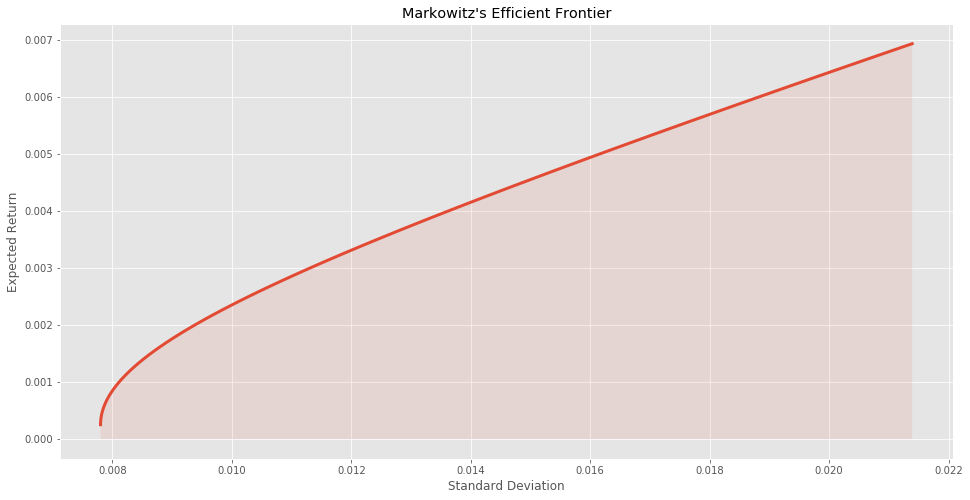

In [44]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.figure(figsize=(16,8))
plt.fill_between(stds, rets, alpha=.1)
plt.plot(stds, rets, linewidth=3)
plt.title("Markowitz's Efficient Frontier")
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

### B. Robust Mean-Variance Optimization

We now consider a robust version of portfolio optimization problem given by

\begin{align}
    & \underset{x \in \mathbb{R}^p}{\text{minimize }} & & x^\top C x \\
    & \text{ subject to } & & x^\top r \geq t, \ \forall r \in \mathcal{U} , \ \sum_{i = 1}^p x_i = 1
\end{align}

where $\mathcal{U}=\left\{\hat{r}+\alpha C^{1/2}v \mid \|v\|_2 \leq 1\right\}$ is an $\alpha$-standard deviation uncertainty set for $r$ ($\alpha \ge 0$ being a scalar). Show that the aforementioned program can be reformlated as the following SOCP:

\begin{align} 
    & \underset{x \in \mathbb{R}^p}{\text{minimize }} & & x^\top C x \\
    & \text{ subject to } & & \alpha \left\|C^{1/2} x \right\|_2 \leq x^\top \hat r - t, \ \sum_{i = 1}^p x_i = 1
\end{align}

### SOLUTION.

The condition 

$$\forall r \in \mathcal{U}: x^\top r \ge t$$

for $\mathcal{U}=\{\hat{r}+\alpha C^{1/2}v \mid \|v\|_2 \leq 1\}$ is equivalent to

\begin{align}
    \underset{r \in \mathcal{U}}{\text{min }} r^\top x \ge t & \iff
        \hat{r}^\top x + \underset{\|v\|_2 \le 1}{\text{min }} \alpha v^\top  (C^{1/2}x) \ge t\\
        & \iff \hat{r}^\top x - \alpha \|C^{1/2}x\|_2 \ge t
\end{align}

Here, we used the fact that $C^{1/2}$ is symmetric and that $\underset{\|v\|_2 \le 1}{\text{min }} v^\top z = - \|z\|_2$ for any vector $z$.

### C. Defining the Confidence Set

Now let's find an interpretation for the parameter $\alpha$. Assuming that the return vector $r$ is a Gaussian random variable with mean $\hat{r}$ and positive-definite covariance $C$, we have 

$$P(r_1, \dots, r_p) = (2\pi)^{-\frac{p}{2}} \cdot \mathbf{det}(C)^{-\frac{1}{2}} \cdot \exp\left(-\frac{1}{2}(r-\hat{r})^\top C^{-1} (r - \hat{r})\right)$$

We seek to construct our portfolio such that the probability of the return being less than a target value $t$ is less than $\epsilon$, or, stated mathematically,

\begin{align}
    & \underset{x \in \mathbb{R}^p}{\text{minimize }} & & x^\top C x \\
    & \text{ subject to } & & \text{Pr}\left(r^\top x \le t\right) \le \epsilon, \ \sum_{i = 1}^p x_i = 1
\end{align}

Show that the constraint

$$\text{Pr}\left(r^\top x \le t\right) \le \epsilon$$

is equivalent to

$$\kappa(\epsilon) \left\|C^{1/2} x \right\|_2 \leq x^\top \hat r - t$$

where $\kappa(\epsilon) = \Phi^{-1}(1-\epsilon)$ and $\Phi^{-1}(\cdot)$ is the quantile function of the standard normal distribution. _**Hint:** for a Gaussian random vector $y \sim \mathcal{N}(0, \mathbb{I})$, we have that $\text{Pr}(a^\top y \le t) = \Phi\left(t/\|a\|_2\right)$._

### SOLUTION.

Since the covariance matrix $C$ is postive definite, so is $C^{-1}$. Thus, the eigenvalue decomposition of $C^{-1}$ can be written as $C^{-1} = V\Lambda^{-1} V^\top $, where each column of $V$ is an eigenvector of $C^{-1}$ (and $C$ as well) and $\Lambda = \mathbf{diag}(\lambda_1, \cdots, \lambda_p)$ for eigenvalues $\lambda_i$. We can further show that if we let $R = V\Lambda^{-1/2}V$, we have $C^{-1} = RR^\top$. Now, let $y = R^\top (r-\hat{r})$ such that we obtain a Gaussian random vector $y \in \mathbb{R}^p$ satisfying

$$P(y_1, \cdots, y_p) = (2\pi)^{-\frac{p}{2}} \exp\left(-\frac{1}{2}y^\top  \mathbb{I}_p y\right)$$

In other words, $y$ is a Gaussian random vector with zero mean and identity covariance. The condition that

$$\text{Pr}\left(r^\top x \le t\right) \le \epsilon$$

is equivalent to

\begin{align}
    \text{Pr}\left((r - \hat{r})^\top x \le t - \hat{r}^\top x\right) \le \epsilon & \iff
        \text{Pr}\left((r - \hat{r})^\top RR^{-1}x \le t - \hat{r}^\top x\right) \le \epsilon \\ 
        & \iff \text{Pr}(y^\top R^{-1}x \le t - \hat{r}^\top x) \le \epsilon \\
        & \iff \Phi\left(\frac{t - \hat{r}^\top x}{\|R^{-1}x\|_2}\right) \le \epsilon \\
        & \iff \frac{t - \hat{r}^\top x}{\left\|R^{-1}x\right\|_2} \le \Phi^{-1}(\epsilon)
\end{align}

Substituting $R^{-1}$ in the above expression, we have $\left\|R^{-1}x\right\|_2 = \sqrt{x^\top  R^{-T}R^{-1} x} = \sqrt{x^\top  C x} = \left\|C^{1/2}x\right\|_2$. Then, using the fact that

$$-\Phi^{-1}(\epsilon) = \Phi^{-1}(1-\epsilon) = \kappa(\epsilon)$$

we have that

$$\text{Pr}\left(r^\top x \le t\right) \le \epsilon \iff \kappa(\epsilon) \left\|C^{1/2}x\right\|_2 \le x^\top \hat{r} - t$$

This concludes the proof.

### D. The Robust Efficient Frontier

Sweep the parameter $t$ from $0$ to $10t^*$, solve the above portfolio optimization problem for each $t$ and plot the efficient frontier. Setting $\alpha = 0$ will recover Markowitz's efficient frontier. Set $\alpha = 0.2$ to obtain a robust efficient frontier. Construct the efficient frontiers based on the empirical mean and covariance from historical data (these may not be the same as the mean and covariance that the market eventually realizes). Compare the two efficient frontiers and briefly comment.

### SOLUTION.

We have the $\alpha = 0$ frontier from part A stored in the variables `rets` and `stds`, so we will obtain the $\alpha = 0.2$ frontier and superimpose it thereon. We first solve the robust mean-variance portoflio problem for several $t\in[0,10t^*]$, which we have shown to be an SOCP.

In [46]:
from scipy.linalg import sqrtm

Csqrt = sqrtm(C) # matrix square root of covariance

t_sequence = np.linspace(0, 10*tstar, 100)

stds_robust = []
rets_robust = []

for t in t_sequence:
    
    constraints[-1] = (.2*cvx.norm(Csqrt*x,2) <= x.T*rhat - t)
    pstar = cvx.Problem(objective, constraints).solve()
    
    rets_robust.append(float(x.value.T.dot(rhat)))
    stds_robust.append(np.sqrt(pstar))

Next, we'll display both frontiers in the same figure for comparison.

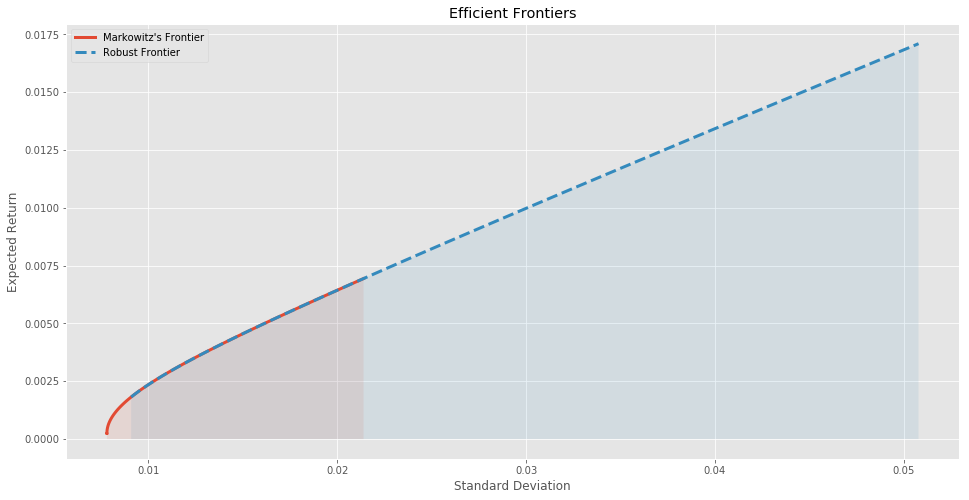

In [51]:
plt.figure(figsize=(16,8))

# Markowitz's Frontier
plt.fill_between(stds, rets, alpha=.1)
plt.plot(stds, rets, linewidth=3, label="Markowitz's Frontier")

# Robust Frontier
plt.fill_between(stds_robust, rets_robust, alpha=.1)
plt.plot(stds_robust, rets_robust, linewidth=3, label='Robust Frontier', linestyle='--')

plt.legend(loc='upper left')

plt.title("Efficient Frontiers")
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

It can be seen that efficient frontiers with different $\alpha$. For $t \in [0, 10t^*]$, optimal robust mean-variance portfolios ($\alpha=0.2$) can reach overall higher expected returns with higher risks than their non-robust counterparts.